In [12]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
    library(Matrix)
    library(Seurat)
    library(R.utils)
})

# Setting up data

Retrieve Seurat Object

In [13]:
cd34_df <- readRDS(file = 'hultCD34_full.RDS')
cd34_df

An object of class Seurat 
41569 features across 58041 samples within 1 assay 
Active assay: RNA (41569 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 dimensional reduction calculated: umap

See Shape of Object

In [14]:
head(cd34_df)

,orig.ident,nCount_RNA,nFeature_RNA,sample,age,cluster,broad_age_range,narrow_age_range,subcluster
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BM1_bcBSQM,SeuratProject,5125,2140,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcCHLB,SeuratProject,5050,2116,BM1,25yr-1,Uncommitted,Adult,Adult,HSC
BM1_bcFZFC,SeuratProject,4761,2024,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcGZEW,SeuratProject,4119,1754,BM1,25yr-1,Uncommitted,Adult,Adult,HSC
BM1_bcFMRM,SeuratProject,4575,1952,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcGXJU,SeuratProject,4285,1993,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcCGNZ,SeuratProject,4158,1882,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcFFAD,SeuratProject,3629,1853,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcAIXH,SeuratProject,3720,1760,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1


In [15]:
nrow(cd34_df)

[1] 41569

In [16]:
ncol(cd34_df)

[1] 58041

Allign Usage scores with Seurat object

In [17]:
cd34_df_alt <- subset(cd34_df, subset = nFeature_RNA >= 200)
cd34_df_alt

An object of class Seurat 
41569 features across 57678 samples within 1 assay 
Active assay: RNA (41569 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 dimensional reduction calculated: umap

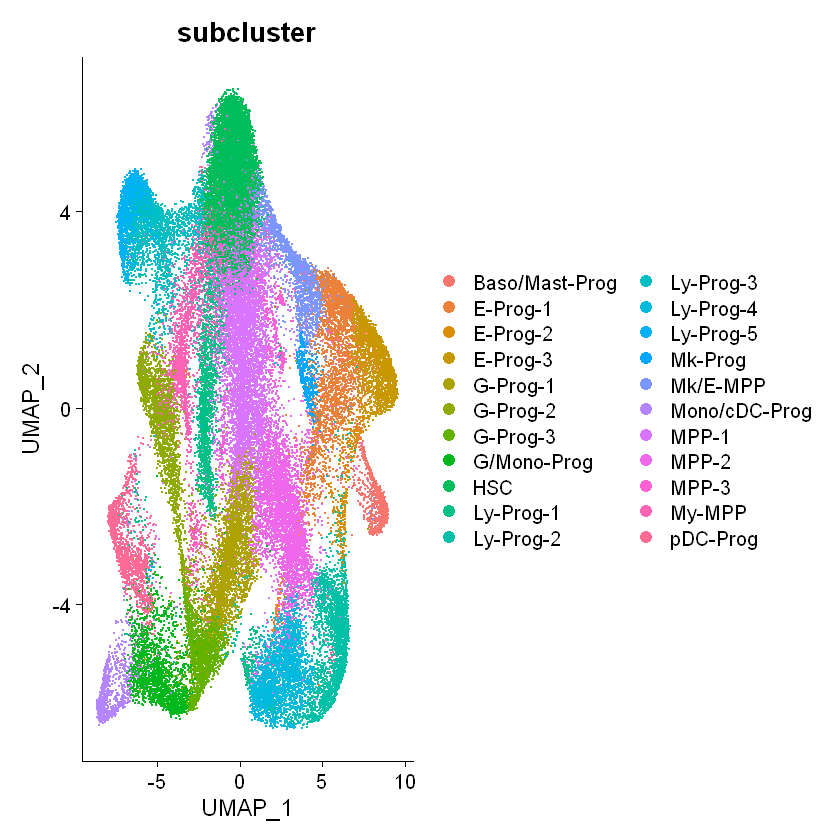

In [18]:
DimPlot(cd34_df_alt, reduction = 'umap', group.by = 'subcluster')

In [19]:
head(cd34_df_alt)

,orig.ident,nCount_RNA,nFeature_RNA,sample,age,cluster,broad_age_range,narrow_age_range,subcluster
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BM1_bcBSQM,SeuratProject,5125,2140,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcCHLB,SeuratProject,5050,2116,BM1,25yr-1,Uncommitted,Adult,Adult,HSC
BM1_bcFZFC,SeuratProject,4761,2024,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcGZEW,SeuratProject,4119,1754,BM1,25yr-1,Uncommitted,Adult,Adult,HSC
BM1_bcFMRM,SeuratProject,4575,1952,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcGXJU,SeuratProject,4285,1993,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcCGNZ,SeuratProject,4158,1882,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcFFAD,SeuratProject,3629,1853,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcAIXH,SeuratProject,3720,1760,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1


In [20]:
cd34_metadata <-cd34_df_alt@meta.data
cd34_metadata

,orig.ident,nCount_RNA,nFeature_RNA,sample,age,cluster,broad_age_range,narrow_age_range,subcluster
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BM1_bcBSQM,SeuratProject,5125,2140,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcCHLB,SeuratProject,5050,2116,BM1,25yr-1,Uncommitted,Adult,Adult,HSC
BM1_bcFZFC,SeuratProject,4761,2024,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcGZEW,SeuratProject,4119,1754,BM1,25yr-1,Uncommitted,Adult,Adult,HSC
BM1_bcFMRM,SeuratProject,4575,1952,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcGXJU,SeuratProject,4285,1993,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcCGNZ,SeuratProject,4158,1882,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcFFAD,SeuratProject,3629,1853,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1
BM1_bcAIXH,SeuratProject,3720,1760,BM1,25yr-1,Uncommitted,Adult,Adult,MPP-1


In [21]:
nrow(cd34_df_alt)

[1] 41569

In [22]:
rownames(cd34_df_alt)

[1] "X5S-rRNA"               "X5-8S-rRNA"            
    [3] "X7SK"                   "A1BG"                  
    [5] "A1BG.AS1"               "A1CF"                  
    [7] "A2M"                    "A2M.AS1"               
    [9] "A2ML1"                  "A2ML1.AS1"             
   [11] "A2ML1.AS2"              "A3GALT2"               
   [13] "A4GALT"                 "A4GNT"                 
   [15] "AA06"                   "AAAS"                  
   [17] "AACS"                   "AADAC"                 
   [19] "AADACL2"                "AADACL2.AS1"           
   [21] "AADACL3"                "AADACL4"               
   [23] "AADAT"                  "AAED1"                 
   [25] "AAGAB"                  "AAK1"                  
   [27] "AAMDC"                  "AAMP"                  
   [29] "AANAT"                  "AAR2"                  
   [31] "AARD"                   "AARS"                  
   [33] "AARS2"                  "AARSD1"                
   [35] "AASDH"                  "AASDHPPT"              
   [37] "AASS"                   "AATBC"                 
   [39] "AATF"                   "AATK"                  
   [41] "AATK.AS1"               "AB015752.3"            
   [43] "AB019440.50"            "ABALON"                
   [45] "ABAT"                   "ABC11.4932300O16.1"    
   [47] "ABC12.49244600F4.4"     "ABC13.47488600E17.1"   
   [49] "ABC13.47656900H15.1"    "ABC14.1188822O7.1"     
   [51] "ABC7.42404400C24.1"     "ABC7.481722F1.2"       
   [53] "ABCA1"                  "ABCA10"                
   [55] "ABCA12"                 "ABCA13"                
   [57] "ABCA2"                  "ABCA3"                 
   [59] "ABCA4"                  "ABCA5"                 
   [61] "ABCA6"                  "ABCA7"                 
   [63] "ABCA8"                  "ABCA9"                 
   [65] "ABCA9.AS1"              "ABCB1"                 
   [67] "ABCB10"                 "ABCB11"                
   [69] "ABCB4"                  "ABCB5"                 
   [71] "ABCB6"                  "ABCB7"                 
   [73] "ABCB8"                  "ABCB9"                 
   [75] "ABCC1"                  "ABCC10"                
   [77] "ABCC11"                 "ABCC12"                
   [79] "ABCC2"                  "ABCC3"                 
   [81] "ABCC4"                  "ABCC5"                 
   [83] "ABCC5.AS1"              "ABCC6"                 
   [85] "ABCC8"                  "ABCC9"                 
   [87] "ABCD1"                  "ABCD2"                 
   [89] "ABCD3"                  "ABCD4"                 
   [91] "ABCE1"                  "ABCF1"                 
   [93] "ABCF2"                  "ABCF3"                 
   [95] "ABCG1"                  "ABCG2"                 
   [97] "ABCG4"                  "ABCG5"                 
   [99] "ABCG8"                  "ABHD1"                 
  [101] "ABHD10"                 "ABHD11"                
  [103] "ABHD11.AS1"             "ABHD12"                
  [105] "ABHD12B"                "ABHD13"                
  [107] "ABHD14A"                "ABHD14B"               
  [109] "ABHD15"                 "ABHD15.AS1"            
  [111] "ABHD16A"                "ABHD16B"               
  [113] "ABHD17A"                "ABHD17B"               
  [115] "ABHD17C"                "ABHD18"                
  [117] "ABHD2"                  "ABHD3"                 
  [119] "ABHD4"                  "ABHD5"                 
  [121] "ABHD6"                  "ABHD8"                 
  [123] "ABI1"                   "ABI2"                  
  [125] "ABI3"                   "ABI3BP"                
  [127] "ABL1"                   "ABL2"                  
  [129] "ABLIM1"                 "ABLIM2"                
  [131] "ABLIM3"                 "ABO"                   
  [133] "ABR"                    "ABRA"                  
  [135] "ABRACL"                 "ABT1"                  
  [137] "ABTB1"                  "ABTB2"                 
  

In [23]:
ncol(cd34_df_alt)

[1] 57678

In [24]:
colnames(cd34_df_alt)

[1] "BM1_bcBSQM"    "BM1_bcCHLB"    "BM1_bcFZFC"    "BM1_bcGZEW"   
    [5] "BM1_bcFMRM"    "BM1_bcGXJU"    "BM1_bcCGNZ"    "BM1_bcFFAD"   
    [9] "BM1_bcAIXH"    "BM1_bcDEPL"    "BM1_bcBLXF"    "BM1_bcDBND"   
   [13] "BM1_bcGTRD"    "BM1_bcBDVL"    "BM1_bcCMUW"    "BM1_bcHFBQ"   
   [17] "BM1_bcEFZJ"    "BM1_bcFNXA"    "BM1_bcDBSV"    "BM1_bcDKTO"   
   [21] "BM1_bcGDGP"    "BM1_bcBTKA"    "BM1_bcBXOY"    "BM1_bcEVLI"   
   [25] "BM1_bcEKLR"    "BM1_bcDSFQ"    "BM1_bcGAEH"    "BM1_bcBPEM"   
   [29] "BM1_bcCKYZ"    "BM1_bcFQYE"    "BM1_bcAXGQ"    "BM1_bcGDZJ"   
   [33] "BM1_bcEXNN"    "BM1_bcEBUX"    "BM1_bcCJTW"    "BM1_bcHELD"   
   [37] "BM1_bcDZLG"    "BM1_bcGHVH"    "BM1_bcCOCU"    "BM1_bcDKEX"   
   [41] "BM1_bcDQWJ"    "BM1_bcEMUU"    "BM1_bcHBXW"    "BM1_bcGNCF"   
   [45] "BM1_bcCYKW"    "BM1_bcAKDA"    "BM1_bcECZM"    "BM1_bcAKKM"   
   [49] "BM1_bcBGJD"    "BM1_bcBEDB"    "BM1_bcEVAM"    "BM1_bcADRL"   
   [53] "BM1_bcCIAQ"    "BM1_bcHAAB"    "BM1_bcCKVD"    "BM1_bcFJNY"   
   [57] "BM1_bcASKS"    "BM1_bcHGZS"    "BM1_bcIBEL"    "BM1_bcGERB"   
   [61] "BM1_bcFRIT"    "BM1_bcDDED"    "BM1_bcAQDP"    "BM1_bcFLXH"   
   [65] "BM1_bcDXZW"    "BM1_bcGORZ"    "BM1_bcDBZZ"    "BM1_bcFTTL"   
   [69] "BM1_bcEFWO"    "BM1_bcIGNO"    "BM1_bcCPIR"    "BM1_bcEJAN"   
   [73] "BM1_bcCWDQ"    "BM1_bcBJYL"    "BM1_bcGBZI"    "BM1_bcCJAM"   
   [77] "BM1_bcEXLD"    "BM1_bcASGV"    "BM1_bcHAHZ"    "BM1_bcHCUF"   
   [81] "BM1_bcDOOK"    "BM1_bcGUAT"    "BM1_bcEFHO"    "BM1_bcGIMX"   
   [85] "BM1_bcHOSH"    "BM1_bcDRST"    "BM1_bcCKGC"    "BM1_bcFDIP"   
   [89] "BM1_bcEMLH"    "BM1_bcEGWO"    "BM1_bcAGBA"    "BM1_bcDHEV"   
   [93] "BM1_bcDIZQ"    "BM1_bcDVWV"    "BM1_bcCIXR"    "BM1_bcBCOO"   
   [97] "BM1_bcGRBN"    "BM1_bcBBSC"    "BM1_bcAWBM"    "BM1_bcCVFK"   
  [101] "BM1_bcEPDG"    "BM1_bcDVFC"    "BM1_bcBJEF"    "BM1_bcEJKB"   
  [105] "BM1_bcGJOG"    "BM1_bcAQGA"    "BM1_bcEQXC"    "BM1_bcDUHZ"   
  [109] "BM1_bcCXSJ"    "BM1_bcBVXW"    "BM1_bcATGY"    "BM1_bcAHPJ"   
  [113] "BM1_bcGURE"    "BM1_bcGCSS"    "BM1_bcIBAC"    "BM1_bcGCLH"   
  [117] "BM1_bcGUSE"    "BM1_bcGDPL"    "BM1_bcAXDG"    "BM1_bcCNKM"   
  [121] "BM1_bcDCLR"    "BM1_bcAGDA"    "BM1_bcCWXR"    "BM1_bcCZYX"   
  [125] "BM1_bcAEUV"    "BM1_bcEJMT"    "BM1_bcAZHG"    "BM1_bcCZGG"   
  [129] "BM1_bcENUV"    "BM1_bcDNRP"    "BM1_bcEMZV"    "BM1_bcBRCI"   
  [133] "BM1_bcEFTL"    "BM1_bcFCRJ"    "BM1_bcAOEU"    "BM1_bcHUPS"   
  [137] "BM1_bcGDWO"    "BM1_bcFOAM"    "BM1_bcGZZM"    "BM1_bcABTZ"   
  [141] "BM1_bcBKIP"    "BM1_bcBRQF"    "BM1_bcHHJD"    "BM1_bcFIEM"   
  [145] "BM1_bcETCD"    "BM1_bcHSKO"    "BM1_bcCZDZ"    "BM1_bcFQWJ"   
  [149] "BM1_bcFRNQ"    "BM1_bcETGN"    "BM1_bcGNEX"    "BM1_bcELSD"   
  [153] "BM1_bcCKFO"    "BM1_bcAJYU"    "BM1_bcCYJU"    "BM1_bcCTXC"   
  [157] "BM1_bcFTVE"    "BM1_bcBRNE"    "BM1_bcBXKH"    "BM1_bcDRPJ"   
  [161] "BM1_bcBERW"    "BM1_bcGGUM"    "BM1_bcDEJV"    "BM1_bcEIFX"   
  [165] "BM1_bcGOLJ"    "BM1_bcCKKZ"    "BM1_bcAGEJ"    "BM1_bcAWCC"   
  [169] "BM1_bcFPFK"    "BM1_bcFBMU"    "BM1_bcBGXT"    "BM1_bcBQEX"   
  [173] "BM1_bcGNVK"    "BM1_bcCSHN"    "BM1_bcAGDG"    "BM1_bcBQDA"   
  [177] "BM1_bcCZRW"    "BM1_bcCUWO"    "BM1_bcHKTD"    "BM1_bcHFOJ"   
  [181] "BM1_bcEZPR"    "BM1_bcCJNU"    "BM1_bcGHCK"    "BM1_bcBIDP"   
  [185] "BM1_bcCUYA"    "BM1_bcFWGW"    "BM1_bcCYGS"    "BM1_bcERRJ"   
  [189] "BM1_bcGDGD"    "BM1_bcFIYN"    "BM1_bcBELS"    "BM1_bcEUTE"   
  [193] "BM1_bcAOZD"    "BM1_bcFTLQ"    "BM1_bcHPSS"    "BM1_bcDWAA"   
  [197] "BM1_bcEBCK"    "BM1_bcFLAV"    "BM1_bcDARR"    "BM1_bcAUJL"   
  [201] "BM1_bcBHBT"    "BM1_bcFGHC"    "BM1_bcFNVD"    "BM1_bcERNP"   
  [205] "BM1_bcIBPM"    "BM1_bcBQPE"    "BM1_bcDTBX"    "BM1_bcBNKT"   
  [209] "BM1_bcEIYZ"    "BM1_bcCZCC"    "BM1_bcHGUD"    "BM1_bcIFSO"   
  [213] "BM1_bcHOGH"    "BM1_bcGMDL"    "BM1_bcDINA"    "BM1_bcFKHK"   
  [217] "BM1_bcBRCU"    "BM1_bcDMOK"    "BM1_bcCXFS"    "BM1_bcGGEM"   
  [221] "BM1_bcHGXK"    "BM1_bcCQVW"    "BM1

Import .CSV and .TXT

Contribution scores

In [25]:
gcontri <- read.csv('cNMF4.gene_spectra_score.k_35.dt_0_15.csv')
head(gcontri)

,X,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,X5S-rRNA,5.215443e-05,1.160166e-04,0.0002631377,-1.587250e-04,4.938455e-06,-7.843986e-05,-6.766551e-05,1.330586e-04,1.280320e-05,⋯,1.799670e-06,1.341165e-04,-1.269255e-04,4.967611e-04,6.872893e-05,9.281787e-05,1.992555e-05,0.0001388540,-1.191682e-04,-1.625454e-04
2,X5-8S-rRNA,-1.032737e-04,6.266084e-06,-0.0001078793,-5.282883e-05,-1.810045e-05,-5.597497e-05,-2.298117e-05,-3.558847e-05,1.216252e-05,⋯,-1.891749e-05,-9.935343e-06,-8.536151e-05,5.172354e-04,7.919151e-06,-5.743228e-06,-2.593165e-05,0.0000944562,-6.522805e-05,-2.598399e-05
3,X7SK,-1.550153e-05,1.397282e-04,0.0004614752,-1.799080e-04,-2.091271e-05,-8.265021e-05,-1.075865e-05,1.094554e-04,9.229493e-05,⋯,5.798593e-06,-8.567729e-05,2.014042e-04,5.181986e-05,8.888510e-05,1.553226e-04,-5.117353e-05,0.0001067649,-2.161764e-04,-1.706900e-04
4,A1BG,1.713120e-04,1.172760e-04,-0.0001887819,-1.574418e-04,5.871120e-05,5.445101e-04,-2.630053e-04,-3.999144e-05,2.996525e-05,⋯,1.421461e-04,4.836029e-05,5.519363e-05,-1.441073e-04,-2.566768e-05,1.131585e-04,-9.373671e-05,0.0001222186,3.254582e-05,-5.137559e-05
5,A1BG.AS1,1.167979e-04,1.490527e-04,0.0003941750,5.803493e-05,-3.003544e-05,-4.687981e-05,9.120460e-05,7.565343e-05,-4.369140e-05,⋯,2.693748e-04,-3.104788e-04,1.028818e-04,-1.043390e-04,8.243176e-05,3.574973e-05,-7.103878e-05,0.0001610157,-2.797133e-04,-6.823877e-05
6,A1CF,-3.439168e-04,4.918848e-04,0.0002551298,-7.664977e-04,3.251176e-04,2.330592e-04,4.269903e-04,7.036040e-04,2.264259e-04,⋯,-3.953722e-04,8.912246e-04,2.968651e-04,-5.483327e-04,1.248161e-04,3.310588e-04,-1.899539e-04,0.0006368520,2.223891e-04,1.729103e-04


In [26]:
ncol(gcontri)

[1] 36

In [27]:
nrow(gcontri)

[1] 40040

Usage Scores (Matched with Seurat)

In [28]:
gusage <- read.csv('cNMF4.usages.k_35.dt_0_15.consensus.txt', sep = "\t")
head(gusage)

,X,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,9.941066,7.260921,3.3711902,125.56252,0.00000000,0,0.000000,0.000000,0.0000000,⋯,17.6822378,48.59546,0.000000,0.00000000,3.9553691,2.747324,0.000000,8.490743,0.000000,0.00000
2,1,3.385921,0.000000,0.0000000,138.28459,0.00000000,0,6.527998,3.731253,5.2496763,⋯,0.0000000,13.66827,0.000000,0.00000000,0.7068670,5.087958,5.798068,70.375836,0.000000,0.00000
3,2,17.131093,0.000000,1.6503145,108.64642,0.00000000,0,0.000000,2.185833,13.0362756,⋯,0.5868283,16.04337,0.000000,0.01266879,2.8724054,0.000000,0.000000,40.924850,2.587133,0.00000
4,3,10.196783,7.091310,0.0000000,116.12457,0.00000000,0,0.000000,2.052106,7.1358222,⋯,0.9337780,25.49619,0.000000,0.00000000,0.0000000,0.000000,9.795166,0.000000,0.000000,13.44561
5,4,10.558019,0.000000,0.0000000,77.04998,0.01437185,0,0.000000,0.000000,0.0000000,⋯,0.0000000,26.07317,0.000000,0.00000000,0.8132218,0.000000,11.509362,49.045850,0.000000,0.00000
6,5,4.361720,4.910504,0.3209329,88.65972,0.00000000,0,2.105235,1.206985,0.5108796,⋯,8.6622283,25.24980,8.718013,0.00000000,18.0475174,0.000000,0.000000,90.266050,0.000000,0.00000


In [29]:
ncol(gusage)

[1] 36

In [30]:
nrow(gusage)

[1] 57678

Interesting GEPs
- GEP1 – Monocyte Lineage
- GEP4 – Elderly-biased HSC
- GEP6 – Late-Erythroid Lineage
- GEP14 – Basophil/Mast Cell Lineage
- GEP25 – Dendritic Cell Lineage
- GEP26 – Lymphoid Lineage
- GEP28 – Fetal-biased HSC
- GEP30 – Granulocyte Lineage
- GEP32 – Erythroid Lineage

*taken from cols*

In [31]:
cluster_data <- cd34_metadata$cluster
unique(cluster_data)

[1] "Uncommitted"   "Granulocyte"   "Lymphoid"      "Monocyte/DC"  
[5] "Erythroid"     "Megakaryocyte" "Basophil/Mast"

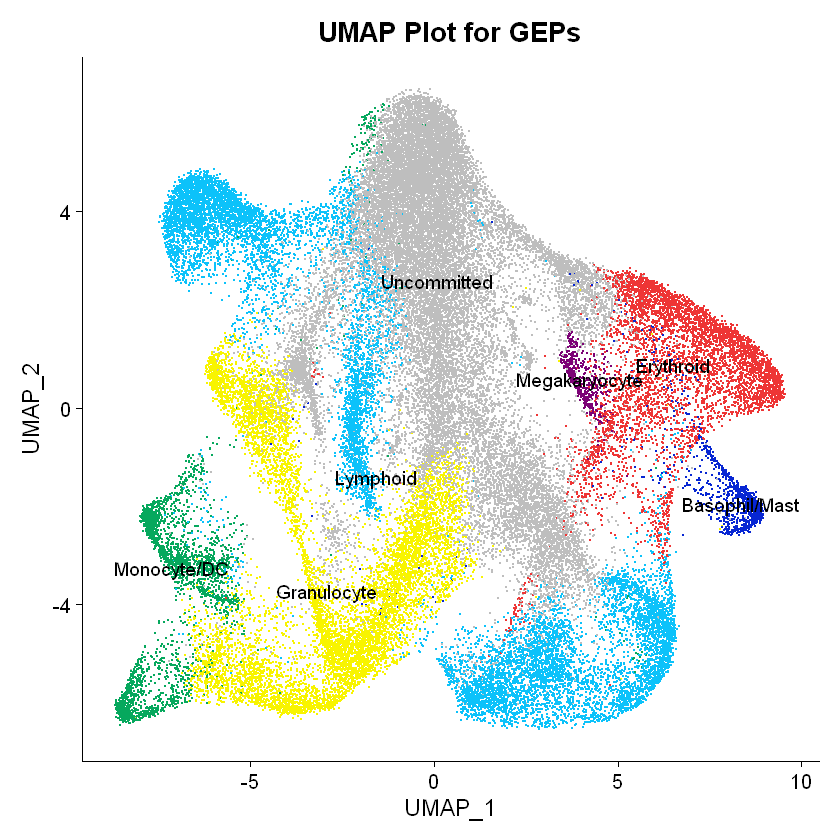

In [32]:
UMAPPlot(cd34_df_alt, group.by = "cluster", label = TRUE,
cols = c(
  "Uncommitted" = "grey",
  "Erythroid" = "#ee35358c",
  "Basophil/Mast" = "#0726d3cb",
  "Granulocyte" = "#f8f400b4",
  "Lymphoid" = "#0cc2fa",
  "Megakaryocyte" = "#7c0276",
  "Monocyte/DC" = "#06a85dcc"
)) + 
theme(legend.position = "none") +
labs(title = "UMAP Plot for GEPs")

# *CAT Analysis

Interesting GEPs
- GEP1 – Monocyte Lineage
- GEP4 – Elderly-biased HSC
- GEP6 – Late-Erythroid Lineage
- GEP14 – Basophil/Mast Cell Lineage
- GEP25 – Dendritic Cell Lineage
- GEP26 – Lymphoid Lineage
- GEP28 – Fetal-biased HSC
- GEP30 – Granulocyte Lineage
- GEP32 – Erythroid Lineage

*taken from cols*

Rename cd34_df_alt 

In [33]:
cd34 <- cd34_df_alt

View Metadata

In [34]:
cd34@meta.data %>% colnames

[1] "orig.ident"       "nCount_RNA"       "nFeature_RNA"     "sample"          
[5] "age"              "cluster"          "broad_age_range"  "narrow_age_range"
[9] "subcluster"

In [48]:
length(cd34@assays$RNA@var.features)

[1] 2000

In [35]:
counts = cd34@assays$RNA@counts

In [36]:
counts[1:5, 1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
           BM1_bcBSQM BM1_bcCHLB BM1_bcFZFC BM1_bcGZEW BM1_bcFMRM
X5S-rRNA            .          .          .          .          .
X5-8S-rRNA          .          .          .          .          .
X7SK                .          .          .          .          .
A1BG                .          .          .          .          .
A1BG.AS1            .          .          .          1          .

In [37]:
print(dim(cd34@assays$RNA@counts))

[1] 41569 57678


In [49]:
# Verify dimensions of the RNA assay's count matrix
if (dim(cd34@assays$RNA@counts)[1] == 0 || dim(cd34@assays$RNA@counts)[2] == 0) {
  stop("Error: The Seurat object's count matrix has zero features or zero cells.")
} else {
  message("Count matrix dimensions: ", dim(cd34@assays$RNA@counts)[1], " features by ", dim(cd34@assays$RNA@counts)[2], " cells.")
}

# Ensure variable features are selected correctly
VariableFeatures(cd34) <- VariableFeatures(cd34)[VariableFeatures(cd34) %in% rownames(cd34@assays$RNA@counts)]

# Check if any variable features remain after filtering
if (length(VariableFeatures(cd34)) == 0) {
  stop("Error: No valid variable features found. Check if FindVariableFeatures has been executed and returned features.")
} else {
  message("Number of variable features: ", length(VariableFeatures(cd34)))
}

# Proceed to scale the data, handling potential empty features gracefully
tryCatch({
  cd34 <- ScaleData(cd34, features = VariableFeatures(cd34))
  message("Data scaling completed successfully.")
}, error = function(e) {
  message("Data scaling failed: ", e$message)
})

Count matrix dimensions: 41569 features by 57678 cells.

Number of variable features: 2000

Centering and scaling data matrix

Data scaling completed successfully.



In [50]:
cd34@meta.data %>% colnames

[1] "orig.ident"       "nCount_RNA"       "nFeature_RNA"     "sample"          
[5] "age"              "cluster"          "broad_age_range"  "narrow_age_range"
[9] "subcluster"

In [52]:
cd34@assays$RNA@var.features

[1] "HBB"                "CLC"                "PF4"               
   [4] "HMOX1"              "LYZ"                "HBA2"              
   [7] "BOLL"               "S100A8"             "SNORA71C"          
  [10] "PPBP"               "HBG2"               "IGFBP3"            
  [13] "S100A9"             "ELANE"              "RP11.872D17.8"     
  [16] "PRTN3"              "HBG1"               "MT1G"              
  [19] "RFC4"               "CTSG"               "RP5.915N17.11"     
  [22] "CLDN20"             "HSPA1B"             "HBA1"              
  [25] "IL17RE"             "MAGI1.AS1"          "AZU1"              
  [28] "MPO"                "C1QA"               "HSPA1A"            
  [31] "HBD"                "CCER1"              "CXCL8"             
  [34] "H19"                "CA1"                "HOXA.AS2"          
  [37] "RN7SL600P"          "RP11.435O5.7"       "MT1H"              
  [40] "RABGGTA"            "RNASE1"             "MIR4513"           
  [43] "AC008073.7"         "DUOX1"              "XX.C2158C6.3"      
  [46] "C1QB"               "OR4C13"             "COL3A1"            
  [49] "MS4A2"              "LINC00459"          "ARHGAP19"          
  [52] "ALB"                "SCGB2B2"            "PTF1A"             
  [55] "MAPK15"             "NAT8"               "HBM"               
  [58] "PEAR1"              "AFP"                "MIP"               
  [61] "RN7SKP108"          "PRG2"               "AXIN2"             
  [64] "RP5.1195D24.1"      "FAM179B"            "APOA2"             
  [67] "RN7SKP164"          "AHSG"               "CCL4"              
  [70] "RP11.498C9.3"       "CD24"               "RP11.547C5.2"      
  [73] "HIST1H4C"           "GAS8.AS1"           "FUZ"               
  [76] "NNAT"               "COLEC11"            "OIT3"              
  [79] "DNTT"               "TCP10L2"            "ENTPD1.AS1"        
  [82] "SERPINA1"           "RP11.298I3.6"       "SLC34A1"           
  [85] "LRRC26"             "LTB"                "AFAP1L1"           
  [88] "FABP1"              "RP11.355I22.5"      "FCGR3A"            
  [91] "MT1E"               "VPS35"              "IRX6"              
  [94] "APOC2"              "FAM178B"            "AHSP"              
  [97] "FTL"                "AC018685.1"         "APOA1"             
 [100] "RP11.59N23.3"       "RNASE2"             "CTGF"              
 [103] "WDR54"              "LMO4"               "ADAMTS19.AS1"      
 [106] "AK5"                "APOC3"              "SRGN"              
 [109] "CCL4L2"             "FGB"                "FAM132A"           
 [112] "RP11.379K22.2"      "G0S2"               "RP11.139H15.5"     
 [115] "ELAVL2"             "AC005618.6"         "C1QC"              
 [118] "ALOXE3"             "RP11.158L12.6"      "GPR158"            
 [121] "AGT"                "HIST1H3F"           "RP11.884K10.6"     
 [124] "SNORA31"            "MEGF6"              "CTC.251D13.1"      
 [127] "AOC1"               "RP13.753N3.1"       "AC118754.4"        
 [130] "SPP1"               "IGKC"               "HSPA1L"            
 [133] "LINC00460"          "AREG"               "GPC3"              
 [136] "ZNF37A"             "TTR"                "MT2A"              
 [139] "RP11.498M15.1"      "RP11.132A1.3"       "ATP6V1C2"          
 [142] "VSIG4"              "APOE"               "TMEM132E"          
 [145] "RP4.633O19--A.1"    "RP11.35J10.6"       "RN7SKP212"         
 [148] "MT1F"               "FCN1"               "ATP2B2.IT2"        
 [151] "SNX25"              "NKX2.2.AS1"         "CTA.223H9.9"       
 [154] "AC105053.3"         "MAFB"               "RP11.109E10.1"     
 [157] "SPATA3.AS1"         "ZMIZ2"              "DAND5"             
 [160] "RP13.638C3.2"       "APOH"               "THBS1"             
 [163] "AC092625.1"         "RP11.900F13.3"      "RP11.661A12.9"     
 [166] "ZNF148"             "TH"                 "RP11.750H9.5"      
 [169] "LGMN"               "HBZ"                "ZNF98"             
 [172] "AC130

In [51]:
counts_alt = cd34@assays$RNA@counts

In [55]:
dim(counts_alt)

[1] 41569 57678

In [41]:
counts_alt[1:5, 1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
           BM1_bcBSQM BM1_bcCHLB BM1_bcFZFC BM1_bcGZEW BM1_bcFMRM
X5S-rRNA            .          .          .          .          .
X5-8S-rRNA          .          .          .          .          .
X7SK                .          .          .          .          .
A1BG                .          .          .          .          .
A1BG.AS1            .          .          .          1          .

In [42]:
dim(counts_alt)

[1] 41569 57678

In [43]:
data_dir ="./starCAT_hultcd34/"
data_dir

[1] "./starCAT_hultcd34/"

Commented out after first run

In [44]:
# # Output counts matrix
# writeMM(counts, 'matrix.mtx')
# gzip('matrix.mtx')

# # Output cell barcodes
# barcodes <- colnames(counts)
# write_delim(as.data.frame(barcodes), 'barcodes.tsv',
#            col_names = FALSE)
# gzip('barcodes.tsv')

# # Output feature names
# gene_names <- rownames(counts)
# features <- data.frame("gene_id" = gene_names,"gene_name" = gene_names,type = "Gene Expression")
# write_delim(as.data.frame(features),delim = "\t", 'features.tsv',
#            col_names = FALSE)
# gzip('features.tsv')

In [45]:
# # Output counts matrix
# writeMM(counts_alt, 'matrix.mtx')
# gzip('matrix.mtx')

# # Output cell barcodes
# barcodes <- colnames(counts_alt)
# write_delim(as.data.frame(barcodes), 'barcodes.tsv',
#            col_names = FALSE)
# gzip('barcodes.tsv')

# # Output feature names
# gene_names <- rownames(counts_alt)
# features <- data.frame("gene_id" = gene_names,"gene_name" = gene_names,type = "Gene Expression")
# write_delim(as.data.frame(features),delim = "\t", 'features.tsv',
#            col_names = FALSE)
# gzip('features.tsv')

In [46]:
length(barcodes)

ERROR: Error: object 'barcodes' not found


In [ ]:
length(gene_names)

[1] 41569

In [ ]:
output_name = 'starCAT_cd34'
counts_fn = "matrix.mtx.gz"
gene_counts = "features.tsv.gz"

In [ ]:
counts_fn

[1] "matrix.mtx.gz"

Try to convert csv to txt (correct file type)

In [ ]:
# library(readr)

In [ ]:
# write.table(gcontri, "cNMF4.gene_spectra_score.k_35.dt_0_15.txt", sep = "\t", row.names = FALSE, col.names = TRUE, quote = FALSE)

In [ ]:
# transpose_data <- as.data.frame(t(gcontri))

In [ ]:
# ncol(transpose_data)

[1] 40040

In [ ]:
# nrow(transpose_data)

[1] 36

### DIMS mismatch

Gene Spectra Score: 
- dim: 36 x 40040
    - gene names: 40040
    - GEPs : 35

Matrix: 
- dim: 41569 x 57678
    - barcodes: 57678
    - gene names: 41569
- variable features: 2000

Less reference genes than Matrix

Try to find intersection. Courtesey of ChatGPT


In [ ]:
# Load necessary libraries
library(Matrix)       # For reading the .mtx file
library(dplyr)        # For data manipulation
library(readr)        # For reading text files

# Load the reference gene list
reference_file <- "cNMF4.gene_spectra_score.k_35.dt_0_15.txt"
reference_genes <- read_tsv(reference_file, col_names = FALSE)$X1 # Assuming genes are in the first column
reference_genes <- unique(reference_genes) # Ensure uniqueness of genes

# Load the counts matrix and the gene names associated with it
counts_matrix <- readMM("matrix.mtx.gz")
gene_names_file <- "genes.tsv"  # Assuming gene names are stored in a separate file
counts_genes <- read_tsv(gene_names_file, col_names = FALSE)$X1 # Modify as needed for your file structure
counts_genes <- unique(counts_genes)

# Check for overlap between reference genes and count matrix genes
overlapping_genes <- intersect(reference_genes, counts_genes)

# Output results
cat("Number of genes in reference file:", length(reference_genes), "\n")
cat("Number of genes in counts matrix:", length(counts_genes), "\n")
cat("Number of overlapping genes:", length(overlapping_genes), "\n")

# Identify missing genes
if(length(overlapping_genes) == 0) {
  cat("Warning: No overlapping genes found between reference and counts matrix.\n")
  cat("Non-overlapping genes in reference file:\n")
  print(setdiff(reference_genes, counts_genes))
  cat("Non-overlapping genes in counts matrix:\n")
  print(setdiff(counts_genes, reference_genes))
} else {
  cat("Overlap check passed. Proceeding with analysis...\n")
}


Rows: 40041 Columns: 36
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (36): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Run *CAT

In [ ]:
# write.table(transpose_data, "cNMF4.gene_spectra_score.k_35.dt_0_15_t.txt", sep = "\t", row.names = FALSE, col.names = TRUE, quote = FALSE)

In [ ]:
cmd = paste0('starcat',
             ' --reference ', '"cNMF4.gene_spectra_score.k_35.dt_0_15.txt"',
             ' --counts ', '"', counts_fn, '"',
             ' --output-dir ', '"', data_dir, '"',
             ' --name ', '"', output_name, '"'
           )
cmd

[1] "starcat --reference \"cNMF4.gene_spectra_score.k_35.dt_0_15.txt\" --counts \"matrix.mtx.gz\" --output-dir \"./starCAT_hultcd34/\" --name \"starCAT_cd34\""

In [ ]:
system(cmd)

: 